In [252]:
import os
import folium
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import datetime      #for datetime operations
import calendar      #for calendar for datetime operations
import time          #to get the system time

In [253]:
x1 = pd.ExcelFile('U.S._residential_electricity_price.xlsx')
x2 = pd.read_csv('Predicted_price_of_electricity.csv')

In [254]:
df = x1.parse(x1.sheet_names[0])
# Parse specified sheet(s) into a DataFrame
# Equivalent to read_excel(ExcelFile, ...) See the read_excel
# docstring for more info on accepted parameters

In [255]:
# x2.head()
x2.shape

(40, 2)

In [256]:
# clean the imported dataframe to desired format
# N is how many rows you want to keep
def clean(file):
    df1 = file.iloc[5:]
    df1 = df1.iloc[:, range(3)]
#     df2 = df1.iloc[N:]
    df1.rename(columns={'U.S._residential_electricity_price': 'Date','Unnamed: 1':'Price'}, inplace=True)
    df1.index = np.arange(1, len(df1) + 1)
    return df1

# convert string type date to float format
def conv_date(dataframe,column):
    Date = dataframe[column].tolist()
    newdt=[]
    for i in range(len(dataframe)):
        newdt.append(pd.to_datetime(Date[i]))
        i = i+1
    dataframe['New_Date']=newdt
    dataframe['Year']=dataframe['New_Date'].dt.year.astype(float)
    dataframe['Month']=dataframe['New_Date'].dt.month.astype(float)
    return dataframe

In [257]:
df.shape

(162, 4)

In [258]:
df2 = clean(df)
df2.shape

(157, 3)

In [259]:
df2.head()

,Date,Price,Unnamed: 2
1,Dec 2019,NaN,13.2726
2,Nov 2019,NaN,13.7454
3,Oct 2019,NaN,13.4176
4,Sep 2019,NaN,14.0071
5,Aug 2019,NaN,13.8455


In [260]:
df3=conv_date(df2,'Date')
df3.rename(columns={'Unnamed: 2':'Prediction'}, inplace=True)
df3.head(30)

,Date,Price,Prediction,New_Date,Year,Month
1,Dec 2019,NaN,13.2726,2019-12-01,2019.0,12.0
2,Nov 2019,NaN,13.7454,2019-11-01,2019.0,11.0
3,Oct 2019,NaN,13.4176,2019-10-01,2019.0,10.0
4,Sep 2019,NaN,14.0071,2019-09-01,2019.0,9.0
5,Aug 2019,NaN,13.8455,2019-08-01,2019.0,8.0
6,Jul 2019,NaN,13.8268,2019-07-01,2019.0,7.0
7,Jun 2019,NaN,13.8797,2019-06-01,2019.0,6.0
8,May 2019,NaN,13.692,2019-05-01,2019.0,5.0
9,Apr 2019,NaN,13.5704,2019-04-01,2019.0,4.0
10,Mar 2019,NaN,13.5289,2019-03-01,2019.0,3.0


In [276]:
df3['Month'] = df3['Month'].astype(float)

In [278]:
type(df3['Month'])
df3['Month'].describe()

count    157.000000
mean       6.535032
std        3.479848
min        1.000000
25%        4.000000
50%        7.000000
75%       10.000000
max       12.000000
Name: Month, dtype: float64

In [279]:
df3['Year'].describe()

count     157.000000
mean     2012.955414
std         3.783134
min      2006.000000
25%      2010.000000
50%      2013.000000
75%      2016.000000
max      2019.000000
Name: Year, dtype: float64

In [280]:
df3['Price'].describe()

count     137.00
unique    117.00
top        12.09
freq        4.00
Name: Price, dtype: float64

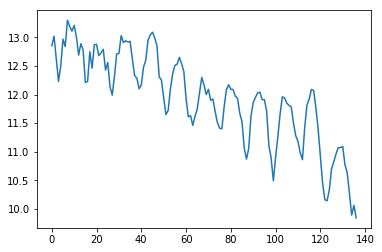

In [261]:
import seaborn as sns
y_train=df3.loc[21:157,{'Price'}].values
x_train = df3.loc[:,{'Date'}].values
plt.plot(y_train)
# sns.distplot(y_train)

In [262]:
# now we need define the prediction data and data used to train/predict model

# seperate the dataframe into history and future
df_future = df3.iloc[range(19),:]
df_future = df_future.loc[:,{'Prediction','Year','Month'}]
df_future.head()
# df_future.head(19)

,Month,Year,Prediction
1,12.0,2019.0,13.2726
2,11.0,2019.0,13.7454
3,10.0,2019.0,13.4176
4,9.0,2019.0,14.0071
5,8.0,2019.0,13.8455


In [286]:
# http://www.datacarpentry.org/python-ecology-lesson/02-index-slice-subset/
df3.shape # 157 
# there should be 138 rows in history dataframe
df_history = df3.iloc[20:157,:]
df_history = df_history.loc[:,{'Price','Year','Month'}]
# index_history = df_history['Month'].index
df_history.head()
# now we are ready to use df_history as dataset

,Month,Year,Price
21,4.0,2018.0,12.8533
22,3.0,2018.0,13.0219
23,2.0,2018.0,12.62
24,1.0,2018.0,12.23
25,12.0,2017.0,12.5


In [264]:
# prepare for training
x_model = df_history[['Year','Month']]
y_model = df_history['Price']

In [265]:
# This is EIA prediction, will be compared with my model prediction
x_future = df_future[['Year','Month']]
y_future = df_future['Prediction']

In [282]:
# better code to check for missing values in train data set
variables_missing_value = df_future.isnull().sum()
variables_missing_value 

Month         0
Year          0
Prediction    0
dtype: int64

In [309]:
# index = train_data['pickup_datetime'].index
df_future['Month']=df_future['Month'].astype(float)
df_future['Year']=df_future['Year'].astype(float)
df_future['Prediction']=df_future['Prediction'].astype(float)
df_future.dtypes

Month         float64
Year          float64
Prediction    float64
dtype: object

In [307]:
df_history['Month']=df_history['Month'].astype(float)
df_history['Year']=df_history['Year'].astype(float)
df_history['Price']=df_history['Price'].astype(float)
# df_history.head(2)
df_history.dtypes

Month    float64
Year     float64
Price    float64
dtype: object

In [310]:
df_future.dtypes

Month         float64
Year          float64
Prediction    float64
dtype: object

Text(0.5,1,'The effect of Month on Electricity Price')

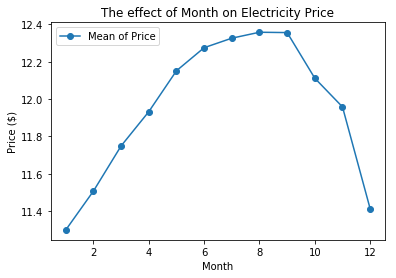

In [323]:
# prediction on electricity price based on month
# df6 = df_future['Prediction'].groupby(df_future['Month']) does not work
df_month = pd.to_numeric(df_history['Price']).groupby(df_history['Month'])
# https://stackoverflow.com/questions/48171492/no-numeric-types-to-aggregate-after-groupby-and-mean
mean_month = df_month.mean()
x_feature = [int(i) for i in mean_month.index]
plt.plot(x_feature, mean_month, marker = 'o', label = 'Mean of Price')
plt.ylabel("Price ($)")
plt.xlabel("Month")
plt.legend(loc='best')
plt.title("The effect of Month on Electricity Price")

Text(0.5,1,'The effect of Year on Electricity Price')

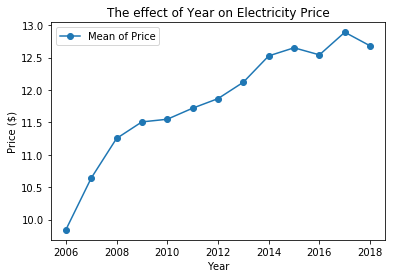

In [325]:
# electricity price based on year
df_year = pd.to_numeric(df_history['Price']).groupby(df_history['Year'])
mean_year = df_year.mean()
x_feature = [int(i) for i in mean_year.index]
plt.plot(x_feature, mean_year, marker = 'o', label = 'Mean of Price')
plt.ylabel("Price ($)")
plt.xlabel("Year")
plt.legend(loc='best')
plt.title("The effect of Year on Electricity Price")

In [270]:
# better code to check for missing values in train data set
variables_missing_value = df_history.isnull().sum()
variables_missing_value 

Month    0
Year     0
Price    0
dtype: int64

In [215]:
from sklearn.cross_validation import train_test_split
# Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(x_model,y_model,train_size=0.8,test_size=0.2,random_state=1)

# Success
print("Training and testing split was successful.")

Training and testing split was successful.


In [216]:
def rmse(y_true,y_pred):
    score=np.square((y_pred)-(y_true)).mean()**0.5
    return score

In [ ]:
# Supervised learning algorithm


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from time import time

# from time import time
start = time() # Get start time
rf=RandomForestRegressor(random_state=1)
rf.fit(X_train,y_train)
end = time() # Get end time
print("Time taken by above cell is {:.7f}s.".format(end - start))

y_pred_rf = rf.predict(X_test)
fscore_rf = rmse(y_test, y_pred_rf)
# Print the results 
print("My RandomForester Regressor Predictor: [RMSE score: {:.8f}]".format(fscore_rf)) 

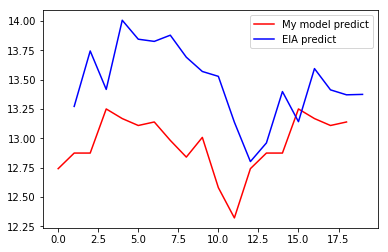

In [223]:
# Now we need predict the next two years electricity price 
# based on trained model
y_pred = rf.predict(x_future)
fscore = rmse(y_future,y_pred)
fscore
My_model_predict=plt.plot(y_pred,'-r',label = 'My model predict') # this is predicted by my model
EIA_predict=plt.plot(y_future,'-b',label = 'EIA predict') # this is predict by government
# plt.legend([My_model_predict, EIA_predict],['My_model_predict', 'EIA_predict'])
plt.legend(loc='upper right')